# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

# Overall model

Insert propper model in the format below -REPLACE!!!

$$
\begin{align*}
c^{\star},\ell^{\star} & = \arg\max_{c,\ell}\log(c)-\nu\frac{\ell^{1+\frac{1}{\varepsilon}}}{1+\frac{1}{\varepsilon}}\\
 & \text{s.t.} \\
x & = m+w\ell-\left[\tau_{0}w\ell+\tau_{1}\max\{w\ell-\kappa,0\}\right] \\
c & \in [0,x] \\
\ell & \in [0,1]
\end{align*}
$$

where $c$ is consumption, $\ell$ is labor supply, $m$ is cash-on-hand,
$w$ is the wage rate, $\tau_{0}$ is the standard labor income tax,
$\tau_{1}$ is the top bracket labor income tax, $\kappa$ is the
cut-off for the top labor income bracket, $x$ is total resources,
$\nu$ scales the disutility of labor, and $\varepsilon$ is the Frisch
elasticity of labor supply.

# Imports and setup

In [2]:
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt
from scipy import optimize

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from inauguralproject import ExchangeEconomyClass #From our py-file

**Explain how you solve the model** (delete?)

In [3]:
# code for solving the model (remember documentation and comments) (DELETE?)

a = np.array([1,2,3])
b = inauguralproject.square(a)
print(b)

[1 4 9]


# Question 1

Explanation...

In [12]:
#Setting up the code needed to construct the Edgeworth box further down

model = ExchangeEconomyClass()

par = model.par

N = 75
w1A = 0.8
w2A = 0.3
w1B = 1 - w1A
w2B = 1 - w2A

grid_x1A = np.linspace(0,1,N+1) # goods between 0 and 1 (included). N+1 to ensure inclusion of endpoints (0 and 1) while still having 75 points in between.
grid_x2A = np.linspace(0,1,N+1)

possible_x1A = [] # we create lists to which we later can append the specific data points.
possible_x2A = []

for x1A in grid_x1A:
    for x2A in grid_x2A:
        x1B = 1 - x1A # make consumer B goods expressed by consumer A goods.
        x2B = 1 - x2A
        uA = model.utility_A(x1A,x2A) # refering to model in py-file.
        uB = model.utility_B(x1B,x2B)

        if uA >= model.utility_A(w1A,w2A) and uB >= model.utility_B(w1B, w2B): # we check if allocations satisfy the conditions and append for depiction in edgeworth box.
            possible_x1A.append(x1A)
            possible_x2A.append(x2A)

print(f'First 3 points of [x1A, x2A] = [{", ".join([f"{x:.4f}" for x in possible_x1A[:3]])}], [{", ".join([f"{x:.4f}" for x in possible_x2A[:3]])}]')
#These points fit with the top left points depicted in the edgeworth box below.


First 3 points of [x1A, x2A] = [0.0800, 0.0933, 0.0933], [0.9600, 0.8800, 0.8933]


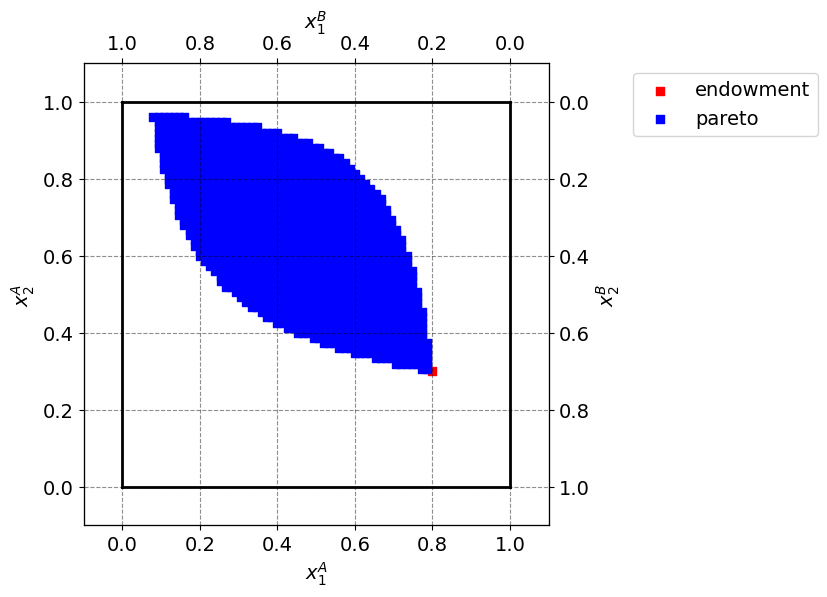

In [13]:
model = ExchangeEconomyClass()

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='red',label='endowment')
ax_A.scatter(possible_x1A,possible_x2A,marker='s',color='blue',label='pareto')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

Conclusion:

# Question 2

Explanation...

[0.533333333333333, 0.47594936708860747, 0.42409638554216866, 0.3770114942528735, 0.334065934065934]
[-0.2666666666666666, -0.25066666666666654, -0.23466666666666652, -0.2186666666666665, -0.2026666666666665]
<class 'list'>
<class 'list'>
<class 'list'>


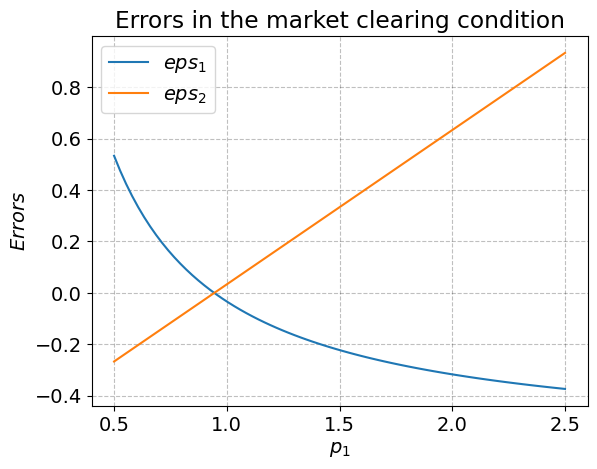

In [85]:
#First we create a list of p1: 
grid_p1 = np.linspace(0.5,2.5,N+1)
p1 = grid_p1.tolist()

# Then we create empty lists of the error terms:
err1 = []
err2 = []

#Using the check_market_clearing from our py-file, we append the eps1 and eps2 to respective error-lists above
for i in p1:
    eps1, eps2 = model.check_market_clearing(i)
    
    err1.append(eps1)
    err2.append(eps2)

# Check
print(err1[0:5])
print(err2[0:5])
print(type(p1))
print(type(err1))
print(type(err2))

# We can display in a figure using matplotlib importet earlier
fig = plt.figure()

# b. create the plot 
ax = fig.add_subplot(1,1,1)

ax.plot(p1,err1,label='$eps_{1}$')
ax.plot(p1,err2,label='$eps_{2}$')

ax.set_title('Errors in the market clearing condition')
ax.set_xlabel('$p_1$')
ax.set_ylabel('$Errors$')
ax.legend(loc='upper left');


Conclusion:

# Question 3

Explanation...

In [135]:
def find_marketclear_p1(p1, err1, err2): #we define a function based on the variables p1, err1 and err2 created above.
    min_diff = float('inf') #min_diff is initially defined to pos infinity we will use for the difference err1 and err2.
    min_diff_p1 = [] # We creat an open list for the corresponding p1
    
    for i in range(len(p1)): #we loop over the i elements in p1
        diff = abs(err1[i] - err2[i]) #we store the difference between the errors for each i
        if diff < min_diff: #if the absolute diff in diff is smaller than the value in min_diff, we want to store that along with the corresponding p1
            min_diff = diff
            min_diff_p1 = p1[i]
    
    return min_diff_p1

# We call the function to store and print the marketprice in the variable marketclear_p1 given the arguments p1, err1, err2.
marketclear_p1 = find_marketclear_p1(p1, err1, err2)
if marketclear_p1 != 0:
    print(f'Market clearing price: p1 = {marketclear_p1:.3f}')
else:
    print("No intersection found.")



Market clearing price: p1 = 0.953


Conclusion:

# Question 4

Explanation...

In [124]:
#not needed - not needed - not needed - not needed - not needed
allocations_x1A_p1 = []
allocations_x2A_p1 = []

for i in p1:
    # Calculate allocation for the current p1 value
    x1A, x2A = model.demand_A(i)
    
    # Append the allocation to the list
    allocations_x1A_p1.append((x1A))
    allocations_x2A_p1.append((x2A))

for idx in range(len(p1)):
    print(f'p1 = {p1[idx]:.3f}')
    print(f'x1A = {allocations_x1A_p1[idx]:.3f}')
    print(f'x2A = {allocations_x2A_p1[idx]:.3f}')

#not needed - not needed - not needed - not needed - not needed

p1 = 0.500
x1A = 0.467
x2A = 0.467
p1 = 0.527
x1A = 0.457
x2A = 0.481
p1 = 0.553
x1A = 0.447
x2A = 0.495
p1 = 0.580
x1A = 0.439
x2A = 0.509
p1 = 0.607
x1A = 0.432
x2A = 0.524
p1 = 0.633
x1A = 0.425
x2A = 0.538
p1 = 0.660
x1A = 0.418
x2A = 0.552
p1 = 0.687
x1A = 0.412
x2A = 0.566
p1 = 0.713
x1A = 0.407
x2A = 0.580
p1 = 0.740
x1A = 0.402
x2A = 0.595
p1 = 0.767
x1A = 0.397
x2A = 0.609
p1 = 0.793
x1A = 0.393
x2A = 0.623
p1 = 0.820
x1A = 0.389
x2A = 0.637
p1 = 0.847
x1A = 0.385
x2A = 0.652
p1 = 0.873
x1A = 0.381
x2A = 0.666
p1 = 0.900
x1A = 0.378
x2A = 0.680
p1 = 0.927
x1A = 0.375
x2A = 0.694
p1 = 0.953
x1A = 0.372
x2A = 0.708
p1 = 0.980
x1A = 0.369
x2A = 0.723
p1 = 1.007
x1A = 0.366
x2A = 0.737
p1 = 1.033
x1A = 0.363
x2A = 0.751
p1 = 1.060
x1A = 0.361
x2A = 0.765
p1 = 1.087
x1A = 0.359
x2A = 0.780
p1 = 1.113
x1A = 0.356
x2A = 0.794
p1 = 1.140
x1A = 0.354
x2A = 0.808
p1 = 1.167
x1A = 0.352
x2A = 0.822
p1 = 1.193
x1A = 0.350
x2A = 0.836
p1 = 1.220
x1A = 0.349
x2A = 0.851
p1 = 1.247
x1A = 0.3

In [154]:
#Question 4a
def max_utilityA_given_p1(p1): #we define a function based on the variables p1
    max_uA = float('-inf') #we create the variable to store utility higher than minus infinity
    max_uA_p1 = [] # We creat an open list for the corresponding p1
    
    for i in p1: #we loop over the i elements in p1. If demand for both goods given i is pos we will store the utility.
        if 1-model.demand_B(i)[0] > 0 and 1-model.demand_B(i)[1]>0:
            utilityA = model.utility_A(1-model.demand_B(i)[0], 1-model.demand_B(i)[1]) 
            if utilityA > max_uA: #Then if that utility is greater in max_uA, we store it as well as the corresponding price
                max_uA = utilityA
                max_uA_p1 = i
    
    return max_uA_p1, max_uA

val_max_uA_p1, val_max_uA = max_utilityA_given_p1(p1) #we call the function to print the values

print(f'The price is: {val_max_uA_p1:.3f} resulting in the utility: {val_max_uA:.3f}')
print(f'This amount of goods obtained for the given price above is: x1A = {model.demand_A(val_max_uA_p1)[0]:.3f} and x2A = {model.demand_A(val_max_uA_p1)[1]:.3f}')


The price is: 1.887 resulting in the utility: 0.634
This amount of goods obtained for the given price above is: x1A = 0.320 and x2A = 1.206


In [163]:
#Question 4b

#We use the function as created above however this time with a positive p (we set it to ]0;100])

grid_p1_pos = np.linspace(0.001,100,10000)
p1_pos = grid_p1_pos.tolist()

p1 = p1_pos

val_max_uA_p1, val_max_uA = max_utilityA_given_p1(p1)

print(f'The price is: {val_max_uA_p1:.3f} resulting in the utility: {val_max_uA:.3f}')
print(f'This amount of goods obtained for the given price above is: x1A = {model.demand_A(val_max_uA_p1)[0]:.3f} and x2A = {model.demand_A(val_max_uA_p1)[1]:.3f}')

The price is: 1.901 resulting in the utility: 0.634
This amount of goods obtained for the given price above is: x1A = 0.319 and x2A = 1.214


Conclusion:

# Question 5

Explanation...

In [ ]:
#code

Conclusion:

# Question 6

Explanation...

In [ ]:
#code

Conclusion:

# Question 7

Explanation...

In [ ]:
#code

Conclusion:

# Question 8

Explanation...

In [ ]:
#code

Conclusion: